In [1]:
import pandas as pd


In [11]:
df = pd.read_csv('customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [13]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [17]:
df['total_amount'] = df['quantity'] * df['price']


In [23]:
mall_sales = df.groupby('shopping_mall')['total_amount'].sum().reset_index()
print(mall_sales)


       shopping_mall  total_amount
0        Cevahir AVM   12645138.20
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24
3       Istinye Park   24618827.68
4             Kanyon   50554231.10
5   Mall of Istanbul   50872481.68
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
8     Viaport Outlet   12521339.72
9       Zorlu Center   12901053.82


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11996\3619760242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mall_sales, x='shopping_mall', y='total_amount', palette='viridis')


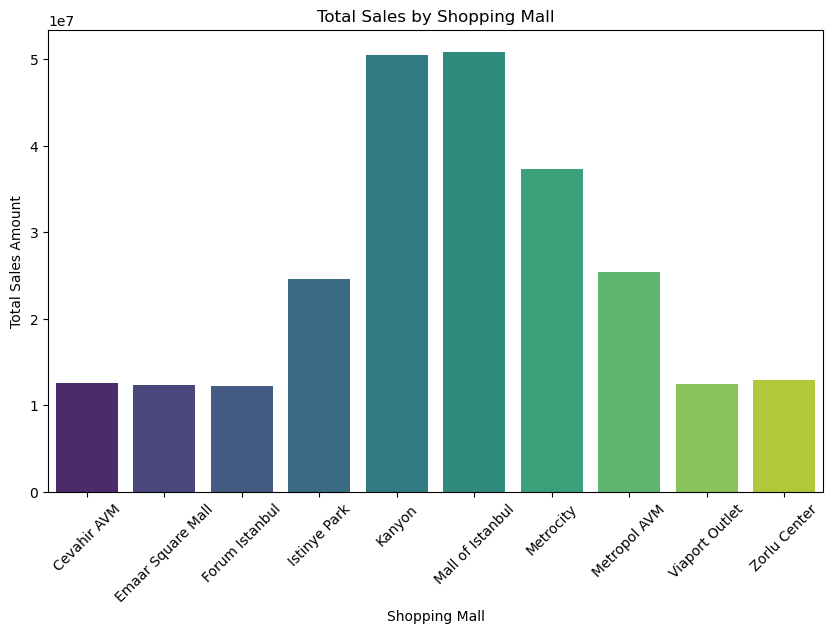

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot for sales by mall
plt.figure(figsize=(10, 6))
sns.barplot(data=mall_sales, x='shopping_mall', y='total_amount', palette='viridis')
plt.title('Total Sales by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


In [29]:
sales_by_region = df.groupby("shopping_mall")["price"].sum()
sales_by_region

shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64

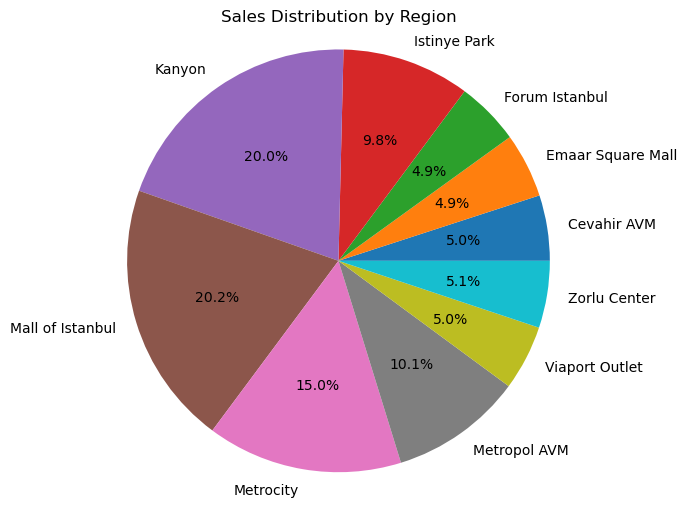

In [33]:
#Create a pie plot to visualize sales distribution by region
plt.figure(figsize=(6, 6))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct="%1.1f%%")
plt.title("Sales Distribution by Region")
plt.axis("equal")
plt.show()

In [35]:
top_malls = mall_sales.sort_values(by='total_amount', ascending=False)
print("Top-performing malls:\n", top_malls.head())


Top-performing malls:
       shopping_mall  total_amount
5  Mall of Istanbul   50872481.68
4            Kanyon   50554231.10
6         Metrocity   37302787.33
7      Metropol AVM   25379913.19
3      Istinye Park   24618827.68


In [37]:
mall_category_sales = df.groupby(['shopping_mall', 'category'])['total_amount'].sum().unstack()
print(mall_category_sales)


category               Books     Clothing   Cosmetics  Food & Beverage  \
shopping_mall                                                            
Cevahir AVM         44541.00   5706321.28   321214.00         44010.45   
Emaar Square Mall   41995.80   5590490.40   338941.76         40610.95   
Forum Istanbul      42056.40   5792444.24   353172.76         39162.24   
Istinye Park        76083.30  11253900.24   655357.88         85918.44   
Kanyon             163029.15  22609527.60  1369550.78        166497.05   
Mall of Istanbul   172240.35  22947417.68  1367517.78        171177.90   
Metrocity          125911.65  17226692.56   991860.04        129902.74   
Metropol AVM        83718.90  11568084.00   680770.38         88638.04   
Viaport Outlet      39632.40   5604594.16   347439.70         41662.18   
Zorlu Center        45343.95   5697318.88   367037.82         41955.06   

category                 Shoes   Souvenir  Technology       Toys  
shopping_mall                               

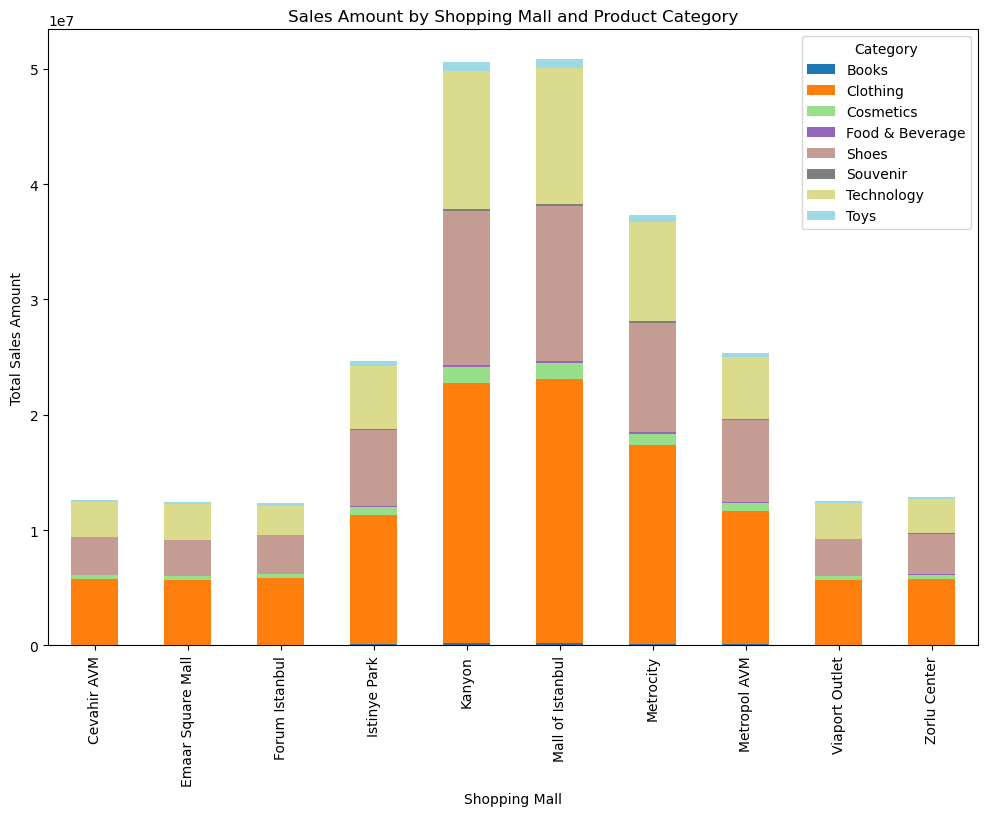

In [39]:
# Stacked Bar Plot for mall and category
mall_category_sales.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Sales Amount by Shopping Mall and Product Category')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales Amount')
plt.legend(title='Category')
plt.show()
